In [1]:
pip install folium 

Note: you may need to restart the kernel to use updated packages.


In [3]:
 import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [5]:
# read in traffic data for analysis 
traffic = pd.read_csv('Traffic_data.csv')

/var/folders/jp/lg_9lz6n3pl67xbgkk8bw9qh0000gn/T/ipykernel_53208/2731140482.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic = pd.read_csv('Traffic_data.csv')


In [6]:
# filter rows where 'Year' is greater than or equal to 2019
filtered_traffic = traffic[traffic['year'] >= 2019]


In [7]:
unique_traffic = filtered_traffic['count_date'].nunique()
print(unique_traffic)

565


In [8]:
#view traffic data
traffic.head()

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,region_ons_code,local_authority_id,local_authority_name,...,buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,all_HGVs,all_motor_vehicles
0,51,N,2004,2004-05-21,7,1,South West,E12000009,1,Isles of Scilly,...,1.0,13,0.0,0.0,0.0,0.0,0,0.0,0.0,19.0
1,51,N,2004,2004-05-21,8,1,South West,E12000009,1,Isles of Scilly,...,2.0,13,7.0,7.0,0.0,0.0,0,0.0,14.0,44.0
2,51,N,2004,2004-05-21,9,1,South West,E12000009,1,Isles of Scilly,...,5.0,17,5.0,0.0,0.0,0.0,0,0.0,5.0,45.0
3,51,N,2004,2004-05-21,10,1,South West,E12000009,1,Isles of Scilly,...,4.0,4,4.0,0.0,0.0,0.0,0,0.0,4.0,41.0
4,51,N,2004,2004-05-21,11,1,South West,E12000009,1,Isles of Scilly,...,3.0,14,6.0,0.0,0.0,0.0,0,0.0,6.0,41.0


In [9]:
#check dtypes for traffic data
traffic.dtypes

count_point_id                    int64
direction_of_travel              object
year                              int64
count_date                       object
hour                              int64
region_id                         int64
region_name                      object
region_ons_code                  object
local_authority_id                int64
local_authority_name             object
local_authority_code             object
road_name                        object
road_category                    object
road_type                        object
start_junction_road_name         object
end_junction_road_name           object
easting                           int64
northing                          int64
latitude                        float64
longitude                       float64
link_length_km                  float64
link_length_miles               float64
pedal_cycles                      int64
two_wheeled_motor_vehicles        int64
cars_and_taxis                  float64


In [10]:
#change date column to date time dtype and change name to 'date' fpr commonality
traffic['date'] = pd.to_datetime(traffic['count_date'])

In [11]:
print(traffic.isnull().sum())

count_point_id                        0
direction_of_travel                   0
year                                  0
count_date                            0
hour                                  0
region_id                             0
region_name                           0
region_ons_code                       0
local_authority_id                    0
local_authority_name                  0
local_authority_code                  0
road_name                             0
road_category                         0
road_type                             0
start_junction_road_name        2717004
end_junction_road_name          2716968
easting                               0
northing                              0
latitude                              0
longitude                             0
link_length_km                  2714664
link_length_miles               2714664
pedal_cycles                          0
two_wheeled_motor_vehicles            0
cars_and_taxis                        1


In [12]:
#drop unnecessary columns with large amount of nulls: here I dropped all motor vehicles and all HGVs to first deal with the other nulls and then re-engineer a new total column
traffic = traffic.drop(['start_junction_road_name', 'end_junction_road_name', 'link_length_km', 'link_length_miles', 'all_motor_vehicles', 'all_HGVs'], axis = 1)

In [13]:
#replace nulls with 0 
traffic = traffic.fillna(0)

In [14]:
#generate a new columns for total motor vehicles and total HGVs
traffic['total_motor_vehicles'] = traffic['two_wheeled_motor_vehicles'] + traffic['cars_and_taxis'] + traffic['LGVs'] + traffic['HGVs_2_rigid_axle'] + traffic['HGVs_3_rigid_axle'] + traffic['HGVs_4_or_more_rigid_axle'] + traffic['HGVs_3_or_4_articulated_axle'] + traffic['HGVs_5_articulated_axle'] + traffic['HGVs_6_articulated_axle']
traffic['total_HGVs'] = traffic['HGVs_2_rigid_axle'] + traffic['HGVs_3_rigid_axle'] + traffic['HGVs_4_or_more_rigid_axle'] + traffic['HGVs_3_or_4_articulated_axle'] + traffic['HGVs_5_articulated_axle'] + traffic['HGVs_6_articulated_axle']

In [15]:
#reorder columns for better readibility 
traffic = traffic[['date', 'year', 'hour', 'region_name', 'local_authority_name', 'road_name', 'road_category', 'road_type', 'easting', 'northing',  'latitude',
       'longitude', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'LGVs', 'HGVs_2_rigid_axle',
       'HGVs_3_rigid_axle', 'HGVs_4_or_more_rigid_axle',
       'HGVs_3_or_4_articulated_axle', 'HGVs_5_articulated_axle',
       'HGVs_6_articulated_axle', 'total_HGVs', 'total_motor_vehicles']]  # the new order of columns


Text(0.5, 1.0, 'Total Traffic Volume Over Time')

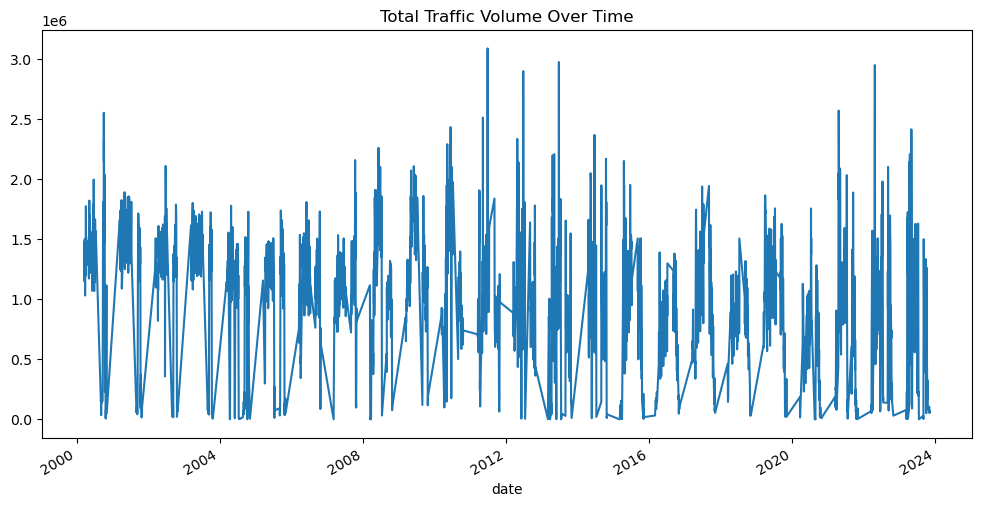

In [16]:
traffic.groupby('date')['total_motor_vehicles'].sum().plot(figsize=(12,6))
plt.title("Total Traffic Volume Over Time")


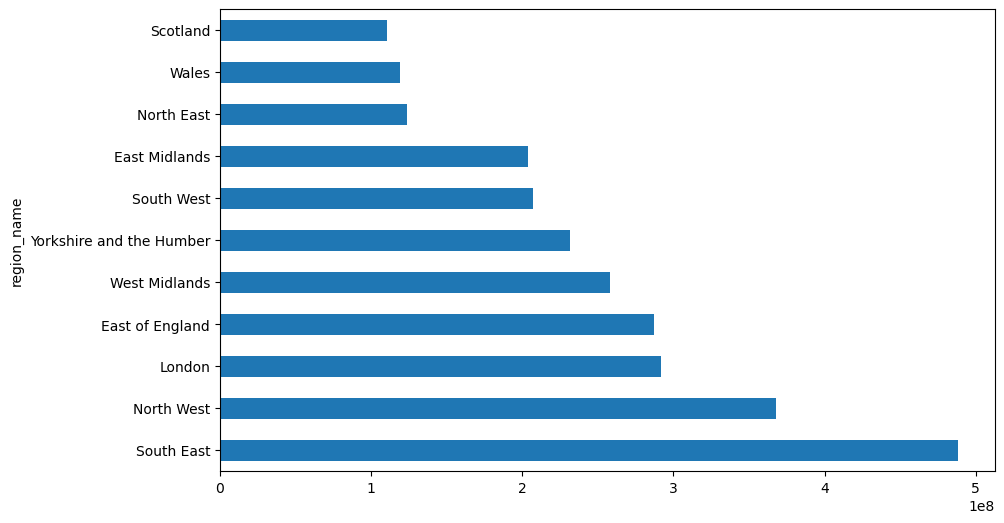

In [17]:
# calculate the grouped data
traffic_grouped = traffic.groupby('region_name')['total_motor_vehicles'].sum().sort_values(ascending=False)

# use the original df to calculate the mean latitude and longitude for the folium map
mean_latitude = traffic[traffic['region_name'].isin(traffic_grouped.index)]['latitude'].mean()
mean_longitude = traffic[traffic['region_name'].isin(traffic_grouped.index)]['longitude'].mean()


traffic_grouped.plot(kind='barh', figsize=(10, 6))

import folium
from folium.plugins import HeatMap

# create the map
m = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=6)

# prepare data for heatmap
heatmap_data = traffic_grouped.reset_index().merge(traffic[['region_name', 'latitude', 'longitude']], on='region_name', how='left')
heatmap_data = heatmap_data[['latitude', 'longitude', 'total_motor_vehicles']].drop_duplicates() # Ensure unique lat/long values

# add the HeatMap layer
HeatMap(data=heatmap_data.values, radius=10).add_to(m)

# display the map
m

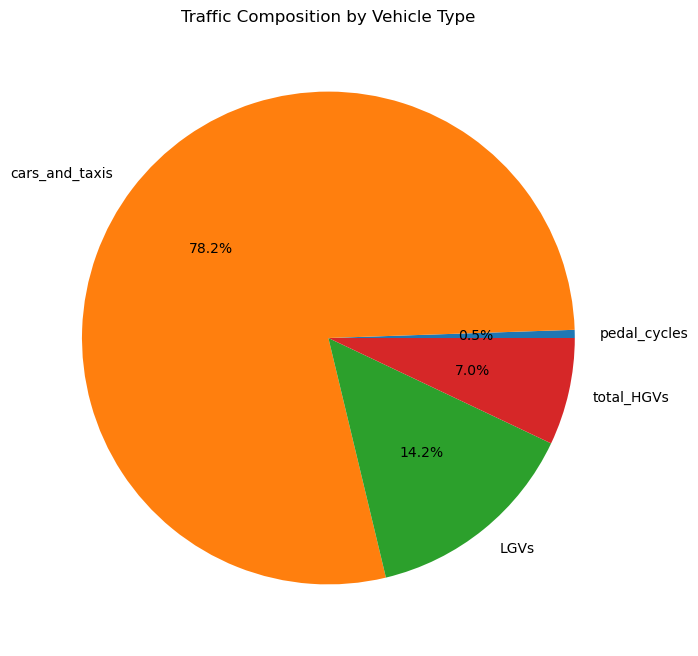

In [18]:
traffic[['pedal_cycles', 'cars_and_taxis', 'LGVs', 'total_HGVs']].sum().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    figsize=(8,8)
)
plt.title('Traffic Composition by Vehicle Type')
plt.ylabel('')
plt.show()


In [34]:
numerical_traffic = ['date', 'year', 'hour', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'LGVs', 'HGVs_2_rigid_axle',
       'HGVs_3_rigid_axle', 'HGVs_4_or_more_rigid_axle',
       'HGVs_3_or_4_articulated_axle', 'HGVs_5_articulated_axle',
       'HGVs_6_articulated_axle', 'total_HGVs', 'total_motor_vehicles']

<Axes: >

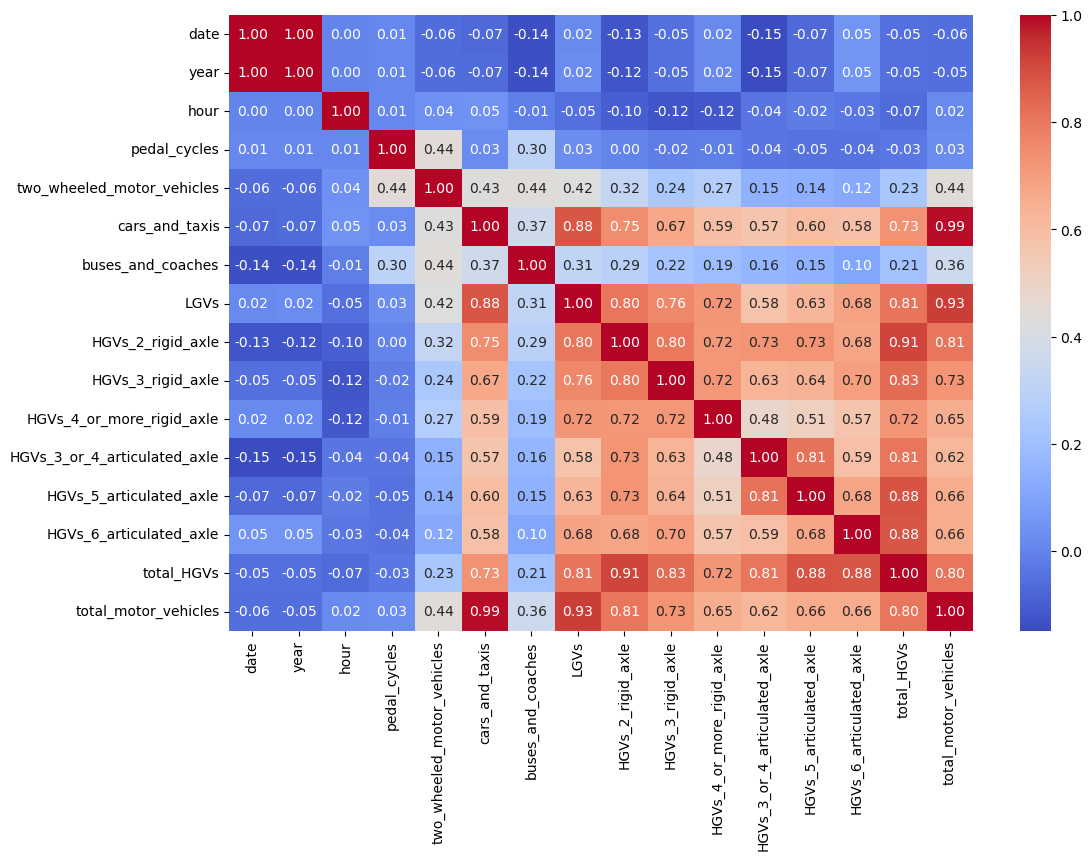

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(traffic[numerical_traffic].corr(), annot=True, cmap='coolwarm', fmt=".2f")


/var/folders/jp/lg_9lz6n3pl67xbgkk8bw9qh0000gn/T/ipykernel_1535/2851392786.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  traffic_hourly = traffic.set_index('date').resample('H').sum()


<Axes: title={'center': 'Hourly Traffic Trends'}, xlabel='date'>

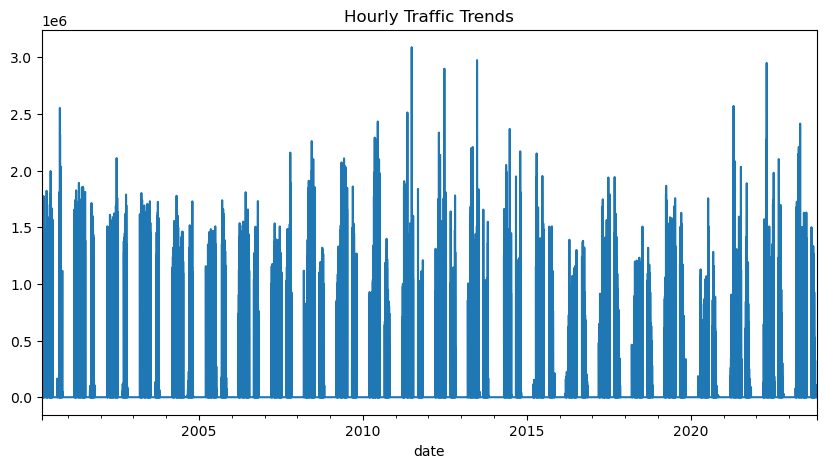

In [37]:
traffic_hourly = traffic.set_index('date').resample('H').sum()
traffic_hourly['total_motor_vehicles'].plot(figsize=(10, 5), title="Hourly Traffic Trends")


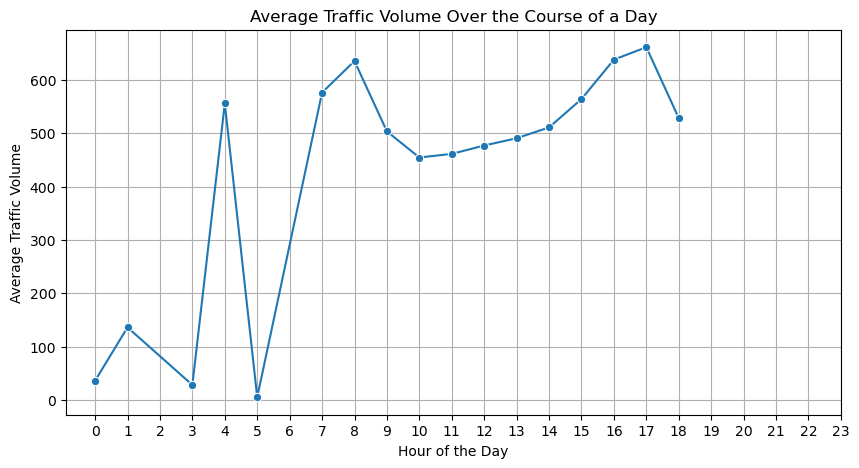

In [38]:
# compute the average number of vehicles for each hour across all days
hourly_avg = traffic.groupby('hour')['total_motor_vehicles'].mean()

# plot the hourly traffic pattern
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o', linestyle='-')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Traffic Volume")
plt.title("Average Traffic Volume Over the Course of a Day")
plt.xticks(range(0, 24)) 
plt.grid()
plt.show()